<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner code, texte et graphiques.

Cet outil est formidable pour plusieurs raisons:

+ Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
+ Il permet aussi de rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ Il est possible d'ajouter des graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandé.

Et gardez à l'esprit qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation des librairies
import pandas as pd
import numpy as np

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir dans Google les mots clés "display all columns dataframe Pandas" par exemple.
#Dans les résultats de la recherche, privilégier les solutions provenant de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
encoding_choice = 'latin-1' 
separator_choice = ';'
#Importation du fichier web.xlsx
df_web = pd.read_csv('web.csv', encoding=encoding_choice, sep=separator_choice)
#Importation du fichier erp.xlsx
df_erp = pd.read_csv('erp.csv', encoding=encoding_choice, sep=separator_choice)
#Importation du fichier liaison.xlsx
df_liaison = pd.read_csv('liaison.csv', encoding=encoding_choice, sep=separator_choice)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
 5   purchase_price  825 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.8+ KB


In [7]:
#Afficher les 5 premières lignes de la table
print(df_erp.head())

   product_id  onsale_web price  stock_quantity stock_status purchase_price
0        3847           1  24,2              16      instock          12,88
1        3849           1  34,3              10      instock          17,54
2        3850           1  20,8               0   outofstock          10,64
3        4032           1  14,1              26      instock           6,92
4        4039           1    46               3   outofstock          23,77


In [8]:
#Vérifier si il y a des lignes en doublon dans la colonne product_id
nombre_doublons = df_erp['product_id'].duplicated().sum()
print("--- Vérification des doublons dans la colonne 'product_id' ---")
print(f"Nombre de lignes en doublon dans la colonne product_id : {nombre_doublons}")

--- Vérification des doublons dans la colonne 'product_id' ---
Nombre de lignes en doublon dans la colonne product_id : 0


In [9]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print("--- Valeurs distinctes de la colonne 'stock_status' ---")
print(df_erp['stock_status'].unique())
print("\n--- Relation entre 'stock_status' et 'stock_quantity' ---")
# On affiche la moyenne du stock pour chaque statut
stock_par_statut = df_erp.groupby('stock_status')['stock_quantity'].mean().reset_index()
print(stock_par_statut)

--- Valeurs distinctes de la colonne 'stock_status' ---
['instock' 'outofstock']

--- Relation entre 'stock_status' et 'stock_quantity' ---
  stock_status  stock_quantity
0      instock       24.309686
1   outofstock       -0.086957


In [10]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"
# 2. Création de la colonne "stock_status_2"
# Si 'stock_quantity' est <= 0, alors 'outofstock', sinon 'instock'
df_erp['stock_status_2'] = np.where(
    df_erp['stock_quantity'] <= 0,
    'outofstock',
    'instock'
)

# 3. Afficher les premières lignes pour vérifier le résultat
print("--- Vérification de la nouvelle colonne 'stock_status_2' ---")
print(df_erp[['stock_quantity', 'stock_status', 'stock_status_2']].head(10))

# 4. Afficher le nombre de différences pour l'analyse
differences = (df_erp['stock_status'] != df_erp['stock_status_2']).sum()
print(f"\nNombre de lignes où 'stock_status' et 'stock_status_2' diffèrent : {differences}")

--- Vérification de la nouvelle colonne 'stock_status_2' ---
   stock_quantity stock_status stock_status_2
0              16      instock        instock
1              10      instock        instock
2               0   outofstock     outofstock
3              26      instock        instock
4               3   outofstock        instock
5              12      instock        instock
6              12      instock        instock
7              15      instock        instock
8               0   outofstock     outofstock
9               5      instock        instock

Nombre de lignes où 'stock_status' et 'stock_status_2' diffèrent : 2


In [11]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [12]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
comparaison = (df_erp["stock_status"] == df_erp["stock_status_2"])
somme_comparaison = comparaison.sum()
print(somme_comparaison)

823


In [13]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous donne ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46,3,outofstock,"23,77",instock
398,4885,1,"18,7",0,instock,"9,66",outofstock


In [14]:
#Corriger la ou les données incohérentes
df_erp['stock_status'] = df_erp['stock_status_2']
df_erp = df_erp.drop(columns=['stock_status_2'])
#Vérification en utilisant le même code que plus haut pour afficher les problèmes
verification_finale = df_erp[df_erp['stock_status'] != np.where(df_erp['stock_quantity'] <= 0, 'outofstock', 'instock')]

print("--- Vérification finale des lignes en écart après correction ---")
print(verification_finale[['product_id', 'stock_quantity', 'stock_status']])

--- Vérification finale des lignes en écart après correction ---
Empty DataFrame
Columns: [product_id, stock_quantity, stock_status]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############

# Étape de Correction (Ajoutée) : Remplacer les virgules (',') par des points ('.')
# On utilise .astype(str) pour s'assurer que l'opération .str.replace est possible.
df_erp['price'] = df_erp['price'].astype(str).str.replace(',', '.', regex=False)

# CONVERSION DE TYPE : S'assurer que la colonne 'price' est de type float
# Utilisation de errors='coerce' pour transformer toute valeur non numérique en NaN
df_erp['price'] = pd.to_numeric(df_erp['price'], errors='coerce')

# Vérification des prix non renseignés (NaN)
nombre_prix_manquants = df_erp['price'].isnull().sum()
print("Nombres d'articles avec un prix non renseigné: {}".format(nombre_prix_manquants))

# Afficher le prix minimum de la colonne "price"
prix_min = df_erp['price'].min()
print("Prix minimum : {}".format(prix_min))

# Afficher le prix maximum de la colonne "price"
prix_max = df_erp['price'].max()
print("Prix maximum : {}".format(prix_max))

# Afficher les prix inférieurs ou égaux à zéro
prix_negatifs_ou_nuls = df_erp[df_erp['price'] <= 0]
print("\n--- Détail des prix inférieurs ou égaux à 0 ---")
print(prix_negatifs_ou_nuls[['product_id', 'price']])
print(f"\nNombre d'articles avec un prix <= 0 : {len(prix_negatifs_ou_nuls)}")

Nombres d'articles avec un prix non renseigné: 0
Prix minimum : -20.0
Prix maximum : 225.0

--- Détail des prix inférieurs ou égaux à 0 ---
     product_id  price
151        4233  -20.0
469        5017   -8.0
739        6594   -9.1

Nombre d'articles avec un prix <= 0 : 3


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [16]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
quantite_min = df_erp['stock_quantity'].min()
print("Quantité minimum : {}".format(quantite_min))
#Afficher la quantité maximum de la colonne "stock_quantity"
quantite_max = df_erp['stock_quantity'].max()
print("Quantité maximum : {}".format(quantite_max))
#Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
stocks_negatifs = df_erp[df_erp['stock_quantity'] < 0]
print("\n--- Détail des stocks strictement inférieurs à 0 ---")
print(stocks_negatifs[['product_id', 'stock_quantity']])
print(f"\nNombre d'articles avec un stock négatif : {len(stocks_negatifs)}")
#df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0

Quantité minimum : -10
Quantité maximum : 145

--- Détail des stocks strictement inférieurs à 0 ---
     product_id  stock_quantity
449        4973             -10
573        5700              -1

Nombre d'articles avec un stock négatif : 2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [17]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
print("--- Valeurs uniques et leur fréquence dans 'onsale_web' ---")
print(df_erp['onsale_web'].value_counts())

# 2. Afficher les valeurs uniques pour identification
print("\n--- Valeurs uniques (distinctes) dans 'onsale_web' ---")
print(df_erp['onsale_web'].unique())

--- Valeurs uniques et leur fréquence dans 'onsale_web' ---
onsale_web
1    716
0    109
Name: count, dtype: int64

--- Valeurs uniques (distinctes) dans 'onsale_web' ---
[1 0]


In [18]:
#Quelles sont les colonnes à conserver selon vous?
# Toutes les colonnes de df_erp sont pertinentes pour les analyses finales (prix, stock, coût d'achat, statut de vente).
# Nous conservons donc toutes les colonnes restantes :
colonnes_a_conserver = ['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status', 'purchase_price']
print(f"Colonnes conservées dans df_erp : {colonnes_a_conserver}")

Colonnes conservées dans df_erp : ['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status', 'purchase_price']


In [19]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns=['stock_status_2'])

KeyError: "['stock_status_2'] not found in axis"

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [19]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
nombre_achat_manquants = df_erp['purchase_price'].isnull().sum()
print("Nombres d'articles avec un prix d'achat non renseigné: {}".format(nombre_achat_manquants))
#Afficher le prix minimum de la colonne "purchase_price"
prix_achat_min = df_erp['purchase_price'].min()
print("Prix d'achat minimum : {}".format(prix_achat_min))
#Afficher le prix maximum de la colonne "purchase_price"
prix_achat_max = df_erp['purchase_price'].max()
print("Prix d'achat maximum : {}".format(prix_achat_max))

Nombres d'articles avec un prix d'achat non renseigné: 0
Prix d'achat minimum : 10,01
Prix d'achat maximum : 99


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [20]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [21]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  product_type           1429 non-null   object 
 13  post_title             1430 non-null   object 
 14  post_excerpt           716 non-null    object 
 15  post

In [22]:
#Selon vous, quelles sont les colonnes à conserver ?
# Colonnes essentielles à conserver dans df_web :
colonnes_web_a_conserver = [
    'sku',              # CLÉ PRINCIPALE (ID Web) pour la jointure avec df_liaison
    'post_title',       # Nom du produit (utile pour l'analyse et la visualisation)
    'total_sales',      # Ventes réelles (crucial pour le calcul du CA)
    'post_type',        # Pour filtrer les images et ne garder que les 'product'
    'post_name',        # Libellé du produit (URL slug)
    'guid',             # URL du produit (utile pour la vérification)
    'rating_count',     # Notes (pour analyse marketing)
    'average_rating',   # Note moyenne (pour analyse marketing)
    'comment_count'     # Commentaires (pour analyse marketing)
]

print(f"Colonnes de df_web conservées : {colonnes_web_a_conserver}")

Colonnes de df_web conservées : ['sku', 'post_title', 'total_sales', 'post_type', 'post_name', 'guid', 'rating_count', 'average_rating', 'comment_count']


In [23]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web = df_web.drop(columns=['virtual', 'downloadable', 'tax_status', 'tax_class', 'post_author', 'post_date', 'post_date_gmt', 'post_content', 'product_type', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_password', 'post_modified', 'post_modified_gmt', 'post_content_filtered', 'post_parent', 'menu_order', 'post_mime_type'])

In [24]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
valeurs_uniques_sku = df_web['sku'].unique()
print(valeurs_uniques_sku)

# 2. Compter le nombre de valeurs manquantes (NaN)
nan_count = df_web['sku'].isnull().sum()
print(f"\nNombre de valeurs manquantes (NaN) dans 'sku' : {nan_count}")

# 3. Identifier les valeurs qui sont des chaînes vides ('' ou ' ')
empty_string_count = df_web[df_web['sku'].isin(['', ' '])].shape[0]
print(f"Nombre de chaînes vides ('', ' ') dans 'sku' : {empty_string_count}")

['11862' '16057' '14692' '16295' '15328' '15471' '16515' '16246' nan
 '13572' '16513' '16585' '16269' '15526' '12869' '15575' '11586' '14338'
 '15425' '16560' '15361' '13809' '11587' '15022' '14323' '16342' '16029'
 '15475' '13754' '14680' '15875' '9636' '13849' '13662' '16564' '13557'
 '15429' '14712' '15032' '15481' '15448' '16580' '15441' '804' '15300'
 '13958' '16071' '15678' '13895' '15711' '12882' '16053' '13766' '16247'
 '12640' '15292' '15476' '15670' '16189' '16038' '14864' '16044' '15324'
 '15531' '15953' '15413' '15733' '14366' '15895' '15892' '16472' '15185'
 '16010' '15793' '15849' '12315' '15741' '15934' '15148' '15781' '15659'
 '15106' '15490' '14507' '14149' '16307' '13736' '14090' '16037' '15758'
 '14661' '12587' '15337' '15489' '15201' '16305' '16131' '13435' '15747'
 '12203' '14509' '14768' '16262' '14561' '16505' '15717' '16129' '13460'
 '15871' '15940' '11602' '13127' '13520' '15480' '13032' '15436' '15269'
 '15910' '19821' '16263' '15138' '15146' '15126' '15482' '

In [25]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
# Re-conversion en numérique pour identifier les codes non conformes (qui deviennent NaN)
df_web['sku_temp'] = pd.to_numeric(df_web['sku'], errors='coerce')

# Affichage des lignes où 'sku' n'a pas pu être converti en nombre (i.e. codes non numériques)
df_web[df_web['sku_temp'].isnull()][['sku', 'post_title', 'post_type']].head

<bound method NDFrame.head of                       sku         post_title post_type
8                     NaN                NaN       NaN
20                    NaN                NaN       NaN
30                    NaN                NaN       NaN
37                    NaN                NaN       NaN
41                    NaN                NaN       NaN
...                   ...                ...       ...
1387  bon-cadeau-25-euros  Bon cadeau de 25   product
1429                  NaN                NaN       NaN
1432                  NaN                NaN       NaN
1445                  NaN                NaN       NaN
1457                  NaN                NaN       NaN

[89 rows x 3 columns]>

In [26]:
#Identifier les lignes sans code article
# Identification des lignes où le code article (sku) est manquant (NaN)
lignes_sans_sku = df_web[df_web['sku'].isnull()]

# Affichage des lignes problématiques
print("--- Lignes de df_web sans code article (sku) ---")
print(lignes_sans_sku[['sku', 'post_title', 'post_type']].head(5))

# Affichage du nombre total de lignes sans SKU
print(f"\nNombre total de lignes dans df_web sans SKU : {len(lignes_sans_sku)}")

--- Lignes de df_web sans code article (sku) ---
    sku post_title post_type
8   NaN        NaN       NaN
20  NaN        NaN       NaN
30  NaN        NaN       NaN
37  NaN        NaN       NaN
41  NaN        NaN       NaN

Nombre total de lignes dans df_web sans SKU : 85


In [27]:
#Pour les codes articles identifiés, réaliser une analyse et définir l'action à entreprendre
df_web = df_web[df_web['post_type'] == 'product'].dropna(subset=['sku'])
#Seules les lignes ayant un post_type égal à product sont conservées.

#Toutes les lignes où le code article (sku) est manquant (NaN) sont supprimées.

In [28]:
#La clé pour chaque ligne est-elle unique? autrement dit, y a-t-il des doublons?
nombre_doublons_sku = df_web['sku'].duplicated().sum()

# Vérification du nombre total de lignes après nettoyage
nombre_lignes_apres_nettoyage = len(df_web)

print(f"Nombre total de lignes dans df_web après nettoyage : {nombre_lignes_apres_nettoyage}")
print(f"Nombre de doublons dans la colonne 'sku' : {nombre_doublons_sku}")

Nombre total de lignes dans df_web après nettoyage : 714
Nombre de doublons dans la colonne 'sku' : 0


In [29]:
#Les lignes sans code article semblent être toutes non renseignées
#Pour s'en assurer, réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_sans_sku = df_web[df_web['sku'].isnull()].copy()
#2 - Utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs renseignées dans chacune des colonnes
print("--- Information sur le DataFrame sans SKU ---")
df_sans_sku.info()
#3 - Que constatez-vous?
#Il y a 85 lignes sans code article

--- Information sur le DataFrame sans SKU ---
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku             0 non-null      object 
 1   rating_count    0 non-null      int64  
 2   average_rating  0 non-null      float64
 3   total_sales     0 non-null      float64
 4   post_title      0 non-null      object 
 5   post_name       0 non-null      object 
 6   guid            0 non-null      object 
 7   post_type       0 non-null      object 
 8   comment_count   0 non-null      float64
 9   sku_temp        0 non-null      float64
dtypes: float64(4), int64(1), object(5)
memory usage: 0.0+ bytes


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [30]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [31]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [32]:
#Les valeurs de la colonne "product_id" sont-elles toutes uniques?
nombre_doublons_product_id = df_liaison['product_id'].duplicated().sum()
print(f"Nombre de doublons dans la colonne 'product_id' : {nombre_doublons_product_id}")

Nombre de doublons dans la colonne 'product_id' : 0


In [33]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
nombre_doublons_id_web = df_liaison['id_web'].duplicated().sum()
print(f"Nombre de doublons dans la colonne 'id_web' : {nombre_doublons_id_web}")

Nombre de doublons dans la colonne 'id_web' : 90


In [34]:
#Avons-nous des articles sans correspondance?
# Identifier les product_id dans l'ERP
erp_ids = df_erp['product_id'].unique()

# Identifier les product_id dans la Liaison
liaison_erp_ids = df_liaison['product_id'].unique()

# Trouver les ID dans l'ERP qui ne sont PAS dans la Liaison
ids_erp_sans_liaison = set(erp_ids) - set(liaison_erp_ids)

print(f"Nombre d'articles dans l'ERP sans ID Web (absents de df_liaison) : {len(ids_erp_sans_liaison)}")

# Afficher les 5 premiers pour identification (si la liste est longue)
if len(ids_erp_sans_liaison) > 0:
    print(f"Exemples de product_id sans correspondance Web : {list(ids_erp_sans_liaison)[:5]}")

Nombre d'articles dans l'ERP sans ID Web (absents de df_liaison) : 0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [35]:
#Fusion des fichiers df_erp et df_liaison
# 1. Normalisation des types de données pour la clé de jointure 'product_id'
# C'est essentiel pour éviter les erreurs de type (int64 vs object)
df_erp['product_id'] = df_erp['product_id'].astype(str)
df_liaison['product_id'] = df_liaison['product_id'].astype(str)

# Fusion des fichiers df_erp et df_liaison
# Jointure GAUCHE : On garde tous les produits de l'ERP (df_erp)
df_erp_liaison = pd.merge(
    df_erp,
    df_liaison,
    on='product_id',
    how='left'
)

In [36]:
# Filtrer les lignes où 'id_web' est NaN après la jointure (ce sont les articles de l'ERP sans ID Web)
lignes_non_matchantes = df_erp_liaison[df_erp_liaison['id_web'].isnull()]

print(f"Nombre de lignes de l'ERP sans correspondance Web : {len(lignes_non_matchantes)}")
print("\n--- Détail des produits ERP sans ID Web (5 premières lignes) ---")
print(lignes_non_matchantes[['product_id', 'price', 'purchase_price', 'stock_quantity']].head())

Nombre de lignes de l'ERP sans correspondance Web : 91

--- Détail des produits ERP sans ID Web (5 premières lignes) ---
    product_id  price purchase_price  stock_quantity
19        4055   86.1          37,88               0
49        4090   73.0          33,79               0
50        4092   47.0          25,25               0
119       4195   14.1           7,36               0
131       4209   73.5          33,01               0


In [37]:
# Suppression des produits ERP sans lien Web
df_final_clean_clean = df_erp_liaison.dropna(subset=['id_web']).copy()

print(f"\nNombre de lignes conservées pour la suite (après suppression) : {len(df_final_clean_clean)}")


Nombre de lignes conservées pour la suite (après suppression) : 734


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_final_clean et df_web</h3>
</div>

In [38]:
# S'assurer que les clés sont de type string
df_erp_liaison['id_web'] = df_erp_liaison['id_web'].astype(str)
df_web['sku'] = df_web['sku'].astype(str)

# Fusionner les datasets df_erp_liaison et df_web
# Jointure GAUCHE : On garde tous les produits ayant un prix/stock
df_final = pd.merge(
    df_erp_liaison,
    df_web,
    left_on='id_web',
    right_on='sku',
    how='left'
)

In [39]:
# Suppression des doublons basée sur 'sku', en gardant la première occurrence
df_web = df_web.drop_duplicates(subset=['sku'], keep='first')

# Vérification du nombre de doublons restants
nombre_doublons_sku = df_web['sku'].duplicated().sum()

print(f"Nombre de lignes en double (doublons) dans df_web après nettoyage : {nombre_doublons_sku}")

Nombre de lignes en double (doublons) dans df_web après nettoyage : 0


In [40]:
# Identifier les lignes où les données Web sont manquantes après la jointure
# On vérifie si la colonne 'post_title' (qui vient de df_web) est nulle.
lignes_web_manquantes = df_final[df_final['post_title'].isnull()]

print(f"Nombre de produits ERP/Liaison sans fiche Web correspondante : {len(lignes_web_manquantes)}")
print("\n--- Détail des produits sans titre Web (ou fiche Web) ---")
print(lignes_web_manquantes[['product_id', 'id_web', 'post_title', 'total_sales']].head())

Nombre de produits ERP/Liaison sans fiche Web correspondante : 111

--- Détail des produits sans titre Web (ou fiche Web) ---
    product_id id_web post_title  total_sales
19        4055    nan        NaN          NaN
49        4090    nan        NaN          NaN
50        4092    nan        NaN          NaN
119       4195    nan        NaN          NaN
131       4209    nan        NaN          NaN


In [41]:
# Création du catalogue final propre
df_final_clean = df_final[df_final['post_title'].notnull()].copy()

nombre_lignes_final = len(df_final_clean)
nombre_lignes_initial = len(df_final)

print("-" * 50)
print(f"✅ Catalogue final prêt pour l'analyse (df_final_clean)")
print(f"Nombre de produits dans le catalogue initial (df_final) : {nombre_lignes_initial}")
print(f"Nombre de lignes conservées dans df_final_clean : {nombre_lignes_final}")
print("-" * 50)

--------------------------------------------------
✅ Catalogue final prêt pour l'analyse (df_final_clean)
Nombre de produits dans le catalogue initial (df_final) : 825
Nombre de lignes conservées dans df_final_clean : 714
--------------------------------------------------


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

--- Statistiques Descriptives des Prix ---
count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64
--------------------------------------------------


<Axes: title={'center': 'Répartition des Prix de Vente (df_final_clean)'}>

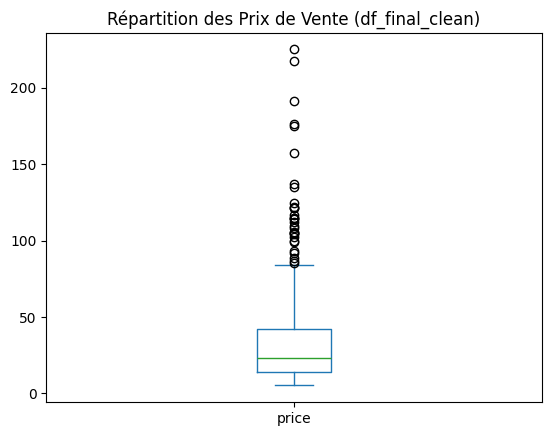

In [42]:
# S'assurer que df_final_clean ne contient pas de lignes sans titre (comme précédemment)
df_final_clean = df_final.dropna(subset=['post_title']).copy()

# Afficher les informations statistiques de base sur les prix
print("--- Statistiques Descriptives des Prix ---")
print(df_final_clean['price'].describe())
print("-" * 50)

# Création de la boîte à moustaches de la répartition des prix
df_final_clean['price'].plot(kind='box', title='Répartition des Prix de Vente (df_final_clean)')

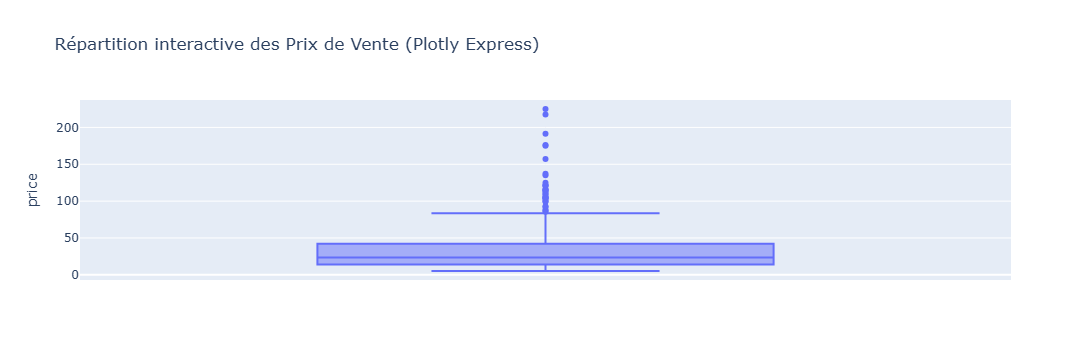

In [43]:
#Autre méthode avec plotly express
fig = px.box(df_final_clean, y='price', title='Répartition interactive des Prix de Vente (Plotly Express)')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [44]:
df_final_clean = df_final.dropna(subset=['post_title']).copy()
#Calculer la moyenne du prix
moyenne_prix = df_final_clean['price'].mean()
print(f"Moyenne des prix : {moyenne_prix:.2f} €")
#Calculer l'écart-type du prix
ecart_type_prix = df_final_clean['price'].std()
print(f"Écart-type des prix : {ecart_type_prix:.2f} €")
#Calculer le Z-score
df_final_clean['zscore_price'] = (df_final_clean['price'] - moyenne_prix) / ecart_type_prix
print("\nColonne 'zscore_price' créée avec succès.")

Moyenne des prix : 32.33 €
Écart-type des prix : 27.60 €

Colonne 'zscore_price' créée avec succès.


In [45]:
#Quel est le seuil prix dont le z-score est supérieur à 3?
seuil_prix = df_final_clean[df_final_clean['zscore_price'] > 3]['price'].min()
print(f"Le seuil de prix au-delà duquel le Z-score est > 3 est : {seuil_prix:.2f} €")

Le seuil de prix au-delà duquel le Z-score est > 3 est : 116.40 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [46]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion
description_prix = df_final_clean['price'].describe()
print("--- Mesures de dispersion pour la colonne 'price' ---")
print(description_prix)

--- Mesures de dispersion pour la colonne 'price' ---
count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64


In [47]:
#Définir un seuil pour les articles "outliers" en prix
# 1. Définition des quartiles Q1 et Q3
Q1 = df_final_clean['price'].quantile(0.25)
Q3 = df_final_clean['price'].quantile(0.75)

# 2. Calcul de l'Intervalle Interquartile (IQR)
IQR = Q3 - Q1
print(f"Intervalle Interquartile (IQR) : {IQR:.2f} €")
# 3. Calcul du seuil supérieur d'outlier (Q3 + 1.5 * IQR)
seuil_outlier_iqr = Q3 + 1.5 * IQR
print(f"Seuil de prix au-delà duquel un article est un outlier (IQR) : {seuil_outlier_iqr:.2f} €")

Intervalle Interquartile (IQR) : 28.01 €
Seuil de prix au-delà duquel un article est un outlier (IQR) : 84.09 €


In [48]:
#Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# 1. Calcul du seuil IQR (si non disponible)
Q1 = df_final_clean['price'].quantile(0.25)
Q3 = df_final_clean['price'].quantile(0.75)
IQR = Q3 - Q1
seuil_outlier_iqr = Q3 + 1.5 * IQR

# 2. Filtrer les articles considérés comme outliers
df_outliers_prix = df_final_clean[df_final_clean['price'] > seuil_outlier_iqr]

# 3. Calcul du nombre et de la proportion
nombre_outliers = len(df_outliers_prix)
taille_catalogue = len(df_final_clean)
proportion_outliers = (nombre_outliers / taille_catalogue) * 100

print(f"Nombre total d'articles dans le catalogue final : {taille_catalogue}")
print(f"Nombre d'articles considérés comme outliers : {nombre_outliers}")
print(f"Proportion des outliers dans le catalogue : {proportion_outliers:.2f} %")

Nombre total d'articles dans le catalogue final : 714
Nombre d'articles considérés comme outliers : 31
Proportion des outliers dans le catalogue : 4.34 %


In [49]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#Les 13 produits à prix très élevé sont justifiés s'ils correspondent à des vins rares, 
#de collection ou de grands crus dont le prix d'achat est proportionnellement très élevé
#Taux de marge = (Marge brute / Coût d'achat HT) x 100

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [50]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article
df_final_clean['CA'] = df_final_clean['price'] * df_final_clean['total_sales']
#Calculer la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web
CA_total_site_web = df_final_clean['CA'].sum()

print(f"Le Chiffre d'Affaires (CA) total du site web est de : {CA_total_site_web:,.2f} €")

Le Chiffre d'Affaires (CA) total du site web est de : 143,680.10 €


--- 20 Articles Générant le plus de Chiffre d'Affaires ---
                                           post_title      CA  price  \
0      Champagne Egly-Ouriet Grand Cru Millésimé 2008  2475.0  225.0   
1   Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  1147.8  191.3   
2           Champagne Egly-Ouriet Grand Cru Brut Rosé  1113.0   79.5   
3               Agnès Levet Côte Rôtie Améthyste 2017   824.0   41.2   
4   Domaine des Comtes Lafon Volnay 1er Cru Santen...   805.0  115.0   
5   Champagne Agrapart &amp; Fils Minéral Extra Br...   781.2   86.8   
6   Domaine des Comtes Lafon Volnay 1er Cru Santen...   735.0  105.0   
7                 Camille Giroud Clos de Vougeot 2016   700.0  175.0   
8              Champagne Gosset Célébris Vintage 2007   675.0  135.0   
9   Champagne Agrapart &amp; Fils L'Avizoise Extra...   672.0  112.0   
10  David Duband Chambolle-Musigny 1er Cru Les Sen...   633.6  105.6   
11  Cognac Frapin Château de Fontpinot 1989 20 Ans...   628.0  157.0   
12  B

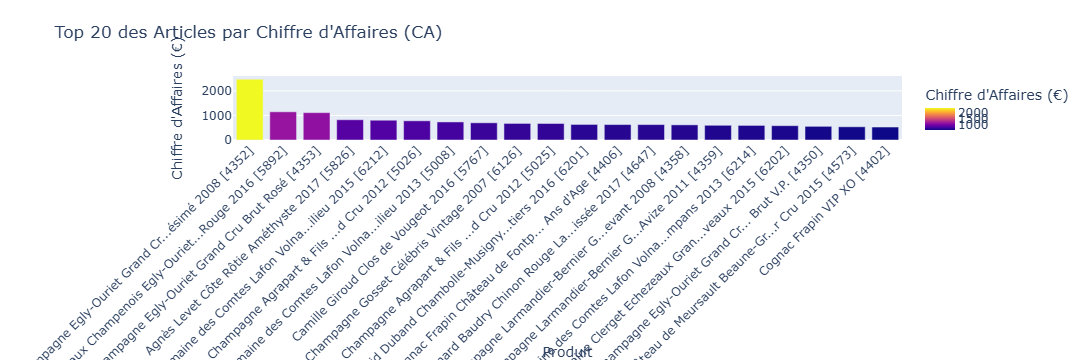

In [51]:
import plotly.express as px

###############################
# Palmarès des articles en CA #
###############################

# 1. Calcul et Tri
# On s'assure que le CA est bien calculé
df_final_clean['CA'] = df_final_clean['price'] * df_final_clean['total_sales']

# Tri décroissant
df_palmares_ca = df_final_clean.sort_values(by='CA', ascending=False).reset_index(drop=True)

# Sélection du Top 20
df_top20_ca = df_palmares_ca.head(20).copy()

# 2. Création d'étiquettes UNIQUES (pour éviter le regroupement)
def make_unique_label(row):
    name = str(row['post_title'])
    # Si le nom est long, on coupe le milieu mais on garde l'année à la fin
    if len(name) > 45:
        name = name[:30] + '...' + name[-10:] 
    # On ajoute l'ID pour rendre la chaîne unique mathématiquement
    return f"{name} [{row['product_id']}]"

df_top20_ca['titre_unique'] = df_top20_ca.apply(make_unique_label, axis=1)

# 3. Affichage Tableau
print("--- 20 Articles Générant le plus de Chiffre d'Affaires ---")
print(df_top20_ca[['post_title', 'CA', 'price', 'total_sales']])

# 4. Graphique
fig_palmares = px.bar(
    df_top20_ca,
    x='titre_unique',  # On utilise notre colonne "unique"
    y='CA',
    title="Top 20 des Articles par Chiffre d'Affaires (CA)",
    labels={'titre_unique': 'Produit', 'CA': "Chiffre d'Affaires (€)"},
    color='CA',
    hover_data=['post_title', 'price', 'total_sales']
)

# Rotation pour lisibilité
fig_palmares.update_layout(
    xaxis={'categoryorder':'total descending', 'tickangle': -45},
    margin=dict(b=150) # Marge en bas pour ne pas couper les textes
)

fig_palmares.show()

In [52]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
CA_total_site_web = df_palmares_ca['CA'].sum()
df_palmares_ca['CA_pourcent'] = (df_palmares_ca['CA'] / CA_total_site_web) * 100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_palmares_ca['CA_cumul'] = df_palmares_ca['CA_pourcent'].cumsum()

print("Deux colonnes 'CA_pourcent' et 'CA_cumul' créées avec succès.")
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
df_80_pourcent_ca = df_palmares_ca[df_palmares_ca['CA_cumul'] <= 80]
nombre_articles_80_pourcent_ca = len(df_80_pourcent_ca) + 1  # +1 pour inclure l'article qui fait basculer à > 80%

print(f"\nLe nombre d'articles représentant 80% du CA est : {nombre_articles_80_pourcent_ca}")
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
taille_catalogue = len(df_palmares_ca)
proportion_articles_80_pourcent_ca = (nombre_articles_80_pourcent_ca / taille_catalogue) * 100

print(f"La proportion que représente ce groupe d'articles est : {proportion_articles_80_pourcent_ca:.2f} % du catalogue total.")

df_palmares_ca["ca_cumul%"] = df_palmares_ca["CA_cumul"] / df_palmares_ca["CA"].sum()
#df_80_poucent_deux = df_palmares_ca["ca_cumul%"] <= 0.8
#print("Le nombre d'articles représantant 80% du CA est : {} articles".format(df_palmares_ca[df_palmares_ca["ca_cumul%"]<=0.8].shape[0]))     
print("Nombre de réf représentant 80% du CA: {} articles".format(df_palmares_ca[df_palmares_ca["ca_cumul%"] <= 0.8].shape[0]))


Deux colonnes 'CA_pourcent' et 'CA_cumul' créées avec succès.

Le nombre d'articles représentant 80% du CA est : 435
La proportion que représente ce groupe d'articles est : 60.92 % du catalogue total.
Nombre de réf représentant 80% du CA: 714 articles


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en quantité</h3>
</div>

--- 20 Articles les plus Vendus en Volume (Quantité) ---
                                           post_title  total_sales  price  \
0   Château De La Selve IGP Coteaux de l'Ardèche M...         36.0    9.9   
1   Mas Laval IGP Pays d'Hérault Les Pampres Blanc...         27.0    9.9   
2               I Fabbri Chianti Classico Lamole 2017         24.0   14.9   
3   Bernard Baudry Chinon Rouge La Croix Boissée 2017         22.0   28.5   
4            François Baur Pinot Noir Schlittweg 2017         22.0   12.7   
5   Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...         20.0    5.2   
6               Agnès Levet Côte Rôtie Améthyste 2017         20.0   41.2   
7   Xavier Frissant Touraine Amboise Chenin Les Pi...         18.0   11.6   
8                        Maurel Pays d'Oc Merlot 2018         17.0    5.8   
9                Château Tour Haut-Caussan Médoc 2015         17.0   17.1   
10               Decelle-Villa Chorey-Lès-Beaune 2016         17.0   29.0   
11  Mourgues du Grè

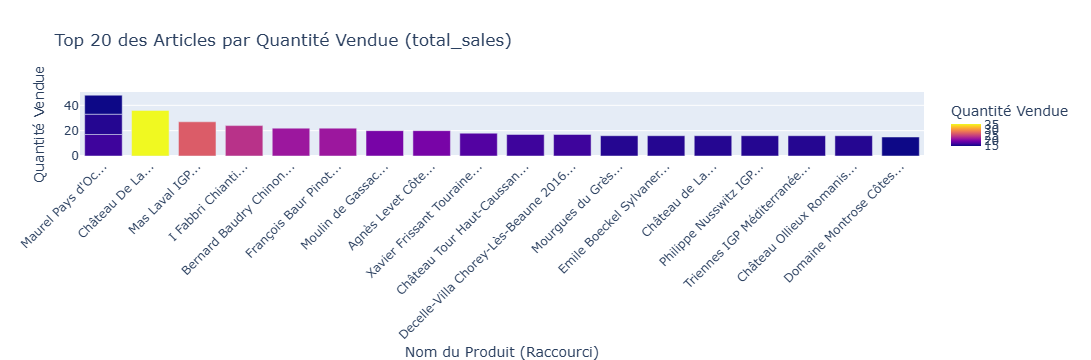

In [53]:
#####################################
# Palmarès des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_final_clean
df_palmares_qty = df_final_clean.sort_values(by='total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_palmares_qty = df_palmares_qty.reset_index(drop=True)
#Afficher les 20 premiers articles en quantité
print("--- 20 Articles les plus Vendus en Volume (Quantité) ---")
print(df_palmares_qty[['post_title', 'total_sales', 'price', 'CA']].head(20))
#Graphique en barre des 20 premiers articles avec plotly express
# Sélection des 20 premières lignes
df_top20_qty = df_palmares_qty.head(20).copy()

# Création d'une colonne de titre raccourci (les 3 premiers mots)
df_top20_qty['titre_court'] = df_top20_qty['post_title'].apply(lambda x: ' '.join(x.split(' ')[:3]) + '...')

# Création du graphique en barres
fig_palmares_qty = px.bar(
    df_top20_qty,
    x='titre_court',
    y='total_sales',
    title='Top 20 des Articles par Quantité Vendue (total_sales)',
    labels={'titre_court': 'Nom du Produit (Raccourci)', 'total_sales': 'Quantité Vendue'},
    color='total_sales', # Coloration basée sur la quantité
    hover_data=['post_title', 'price', 'CA'] # Afficher le titre complet, prix et CA au survol
)

# Rotation des étiquettes de l'axe X pour une meilleure lisibilité
fig_palmares_qty.update_layout(xaxis={'categoryorder':'total descending', 'tickangle': -45})

fig_palmares_qty.show()

In [54]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
qty_total_site_web = df_palmares_qty['total_sales'].sum()
df_palmares_qty['qty_pourcent'] = (df_palmares_qty['total_sales'] / qty_total_site_web) * 100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_palmares_qty['qty_cumul'] = df_palmares_qty['qty_pourcent'].cumsum()

print("Deux colonnes 'qty_pourcent' et 'qty_cumul' créées avec succès.")
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
df_80_pourcent_qty = df_palmares_qty[df_palmares_qty['qty_cumul'] <= 80]
nombre_articles_80_pourcent_qty = len(df_80_pourcent_qty) + 1  # +1 pour inclure l'article qui fait basculer à > 80%

print(f"\nLe nombre d'articles représentant 80% des ventes en quantité est : {nombre_articles_80_pourcent_qty}")
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
taille_catalogue = len(df_palmares_qty)
proportion_articles_80_pourcent_qty = (nombre_articles_80_pourcent_qty / taille_catalogue) * 100

print(f"La proportion que représente ce groupe d'articles est : {proportion_articles_80_pourcent_qty:.2f} % du catalogue total.")

Deux colonnes 'qty_pourcent' et 'qty_cumul' créées avec succès.

Le nombre d'articles représentant 80% des ventes en quantité est : 434
La proportion que représente ce groupe d'articles est : 60.78 % du catalogue total.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

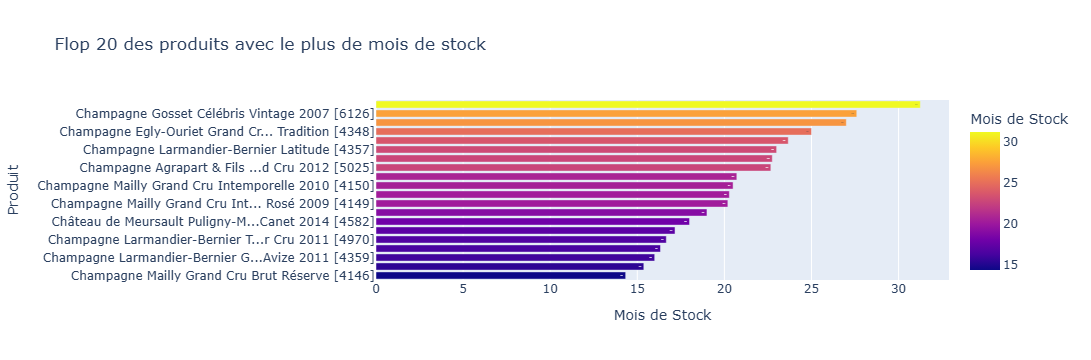

In [55]:
import numpy as np
import plotly.express as px

# 1. Préparation des données
# On filtre d'abord pour ne garder que les produits ayant des ventes (>0)
df_actifs = df_final_clean[df_final_clean['total_sales'] > 0].copy()

# Calcul de la métrique
df_actifs["stock_months"] = df_actifs["stock_quantity"] / df_actifs["total_sales"]
df_actifs['stock_months'] = df_actifs['stock_months'].replace([np.inf, -np.inf], 0)

# Tri pour obtenir le FLOP 20
df_flop = df_actifs.sort_values('stock_months', ascending=False).head(20).copy()

# 2. Création des étiquettes uniques (Style Précédent)
# Indispensable pour que Plotly ne fusionne pas deux vins au nom similaire
def make_unique_label(row):
    name = str(row['post_title'])
    if len(name) > 45:
        name = name[:30] + '...' + name[-10:] 
    return f"{name} [{row['product_id']}]"

df_flop['titre_unique'] = df_flop.apply(make_unique_label, axis=1)

# 3. Graphique
fig = px.bar(
    data_frame=df_flop, 
    y="titre_unique",       # On utilise le titre unique sur l'axe Y
    x="stock_months",       # La valeur sur l'axe X
    orientation="h",        # Barres horizontales
    title="Flop 20 des produits avec le plus de mois de stock",
    labels={'titre_unique': 'Produit', 'stock_months': 'Mois de Stock'},
    color='stock_months',   # Dégradé de couleur
    text_auto='.1f'         # Affiche la valeur précise sur la barre
)

# 4. Inversion de l'axe Y pour avoir le "Pire" (le plus gros stock) tout en haut
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

In [56]:
# 1. On recharge le fichier ERP en précisant le format des nombres
# decimal=',' permet de lire correctement "12,88" comme le nombre 12.88
df_erp = pd.read_csv('erp.csv', sep=';', decimal=',')
# 3. Calcul de la Valorisation du Stock (au coût d'achat)
# On s'assure que les colonnes sont propres (pas de valeurs vides)
df_erp['purchase_price'] = df_erp['purchase_price'].fillna(0)

# Calcul
stock_value = (df_erp['stock_quantity'] * df_erp['purchase_price']).sum()

print("-" * 50)
print(f"Valorisation réelle du stock (Coût d'achat) : {stock_value:,.2f} €")
print("-" * 50)

--------------------------------------------------
Valorisation réelle du stock (Coût d'achat) : 298,555.76 €
--------------------------------------------------


In [57]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity
total_stock_erp = df_erp['stock_quantity'].sum()

print(f"Nombre de bouteilles dans le stock : {total_stock_erp}")

Nombre de bouteilles dans le stock : 17811


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [58]:
# 1. Chargement du fichier ERP avec le bon séparateur décimal
df_erp = pd.read_csv('erp.csv', sep=';', decimal=',')

# 2. On s'assure que les colonnes sont bien des chiffres
df_erp['price'] = pd.to_numeric(df_erp['price'], errors='coerce')
df_erp['purchase_price'] = pd.to_numeric(df_erp['purchase_price'], errors='coerce')

# Il compare directement le prix fichier (TTC) au prix d'achat
df_erp['taux_marge'] = (df_erp['price'] - df_erp['purchase_price']) / df_erp['purchase_price']

# Le taux le plus bas
# Résultat attendu : -2.97...
print(f"Le taux de marge le plus bas : {df_erp['taux_marge'].min()}")

# Le taux le plus haut
# Résultat attendu : 1.29...
print(f"Le taux de marge le plus haut : {df_erp['taux_marge'].max()}")

# Le taux le plus bas positif
# Résultat attendu : 0.55...
print(f"Le taux de marge le plus bas ('taux_marge' >= 0) : {df_erp.loc[df_erp['taux_marge'] >= 0, 'taux_marge'].min()}")

Le taux de marge le plus bas : -2.9739696312364425
Le taux de marge le plus haut : 1.296949650863653
Le taux de marge le plus bas ('taux_marge' >= 0) : 0.5539739027283511


In [59]:
#Affichage de la ligne avec un taux de marge inférieur à 0
ventes_a_perte = df_final_clean[df_final_clean['taux_marge'] < 0]
print("--- Produits Vendus à Perte (Taux de Marge < 0%) ---")
print(ventes_a_perte[['product_id', 'post_title', 'price', 'purchase_price', 'taux_marge']])

KeyError: 'taux_marge'

In [ ]:
#Création d'un dataframe avec les taux positifs
df_taux_positif = df_final_clean[df_final_clean['taux_marge'] >= 0].copy()
#Afficher le prix minimum de la colonne "taux_marge"
min_taux_marge_pos = df_taux_positif['taux_marge'].min()
print(f"\nTaux de marge minimum (sur les taux >= 0%) : {min_taux_marge_pos:.2f} %")
#Afficher le prix maximum de la colonne "taux_marge"
max_taux_marge_pos = df_taux_positif['taux_marge'].max()
print(f"Taux de marge maximum (sur les taux >= 0%) : {max_taux_marge_pos:.2f} %")

In [ ]:
import pandas as pd
import plotly.express as px

# --- ÉTAPE 1 : RÉCUPERATION DE LA COLONNE PERDUE ---

# 1. On recharge juste le fichier Web pour récupérer les types
df_web_temp = pd.read_csv('web.csv', sep=';', decimal=',', encoding='latin-1')
df_web_temp = df_web_temp[df_web_temp['post_type'] == 'product']
df_web_temp = df_web_temp.rename(columns={'sku': 'id_web'})
df_web_temp['id_web'] = df_web_temp['id_web'].astype(str)

# 2. On crée un petit tableau de correspondance : ID -> Type
df_types = df_web_temp[['id_web', 'product_type']].copy()

# 3. On prend votre tableau principal (df_final_clean)
# Assurez-vous que la clé est bien du texte aussi
df_final_clean['id_web'] = df_final_clean['id_web'].astype(str)

# Si la colonne 'product_type' existe déjà mais est cassée, on la supprime pour éviter les doublons
if 'product_type' in df_final_clean.columns:
    df_final_clean = df_final_clean.drop(columns=['product_type'])

# 4. FUSION : On réintègre la colonne 'product_type'
df_final_clean = pd.merge(df_final_clean, df_types, on='id_web', how='left')


# --- ÉTAPE 2 : PRÉPARATION DES DONNÉES ET CALCUL ---

# Conversions numériques de sécurité
df_final_clean['price'] = pd.to_numeric(df_final_clean['price'], errors='coerce')
df_final_clean['purchase_price'] = pd.to_numeric(df_final_clean['purchase_price'], errors='coerce')

# On filtre les prix d'achat > 0
df_analyse = df_final_clean[df_final_clean['purchase_price'] > 0].copy()

# Calcul du Taux de Marge
df_analyse['taux_marge'] = (df_analyse['price'] - df_analyse['purchase_price']) / df_analyse['purchase_price']


# --- ÉTAPE 3 : GRAPHIQUE ---

# Agrégation (Maintenant ça va marcher car 'product_type' est bien là)
df_graph = df_analyse.groupby('product_type')['taux_marge'].mean().reset_index()

# Tri croissant
df_graph = df_graph.sort_values(by='taux_marge', ascending=True)

# Affichage
fig_type_sorted = px.bar(
    df_graph,
    x='product_type',
    y='taux_marge',
    title='Taux de Marge Moyen par Type (Tri Croissant)',
    labels={'product_type': 'Type de Produit', 'taux_marge': 'Taux de Marge'},
    color='product_type',
    text_auto='.3f'
)

fig_type_sorted.update_layout(showlegend=False, yaxis_tickformat='.2f')
fig_type_sorted.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price</h3>
</div>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Chargement et Nettoyage
df_erp = pd.read_csv('erp.csv', sep=';', decimal=',', encoding='latin-1')
df_web = pd.read_csv('web.csv', sep=';', decimal=',', encoding='latin-1')
df_liaison = pd.read_csv('liaison.csv', sep=';', encoding='latin-1')

# Préparation Web
df_web = df_web[df_web['post_type'] == 'product']
df_web = df_web.rename(columns={'sku': 'id_web'})

# Typage des clés
df_web['id_web'] = df_web['id_web'].astype(str)
df_liaison['id_web'] = df_liaison['id_web'].astype(str)

# Fusions
df_temp = pd.merge(df_liaison, df_web, on='id_web', how='inner')
df_final = pd.merge(df_temp, df_erp, on='product_id', how='inner')

# 2. Calculs des Nouvelles Variables
# Conversion numérique de base
for col in ['price', 'purchase_price', 'total_sales', 'stock_quantity']:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

# Calcul du Prix HT (TVA 20%)
df_final['price_ht'] = df_final['price'] / 1.2

# Calcul du Taux de Marge
# Formule : (Prix de vente - Coût d'achat) / Coût d'achat
df_final['taux_marge'] = (df_final['price'] - df_final['purchase_price']) / df_final['purchase_price']

# 3. Sélection des 6 colonnes pour la heatmap
cols_corr = ['stock_quantity', 'total_sales', 'price', 'taux_marge', 'price_ht', 'purchase_price']

# Calcul de la matrice
corr_matrix = df_final[cols_corr].corr()

# 4. Création du Masque (Triangle supérieur)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 5. Affichage Graphique
plt.figure(figsize=(10, 8)) # Taille augmentée pour la lisibilité
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', # Palette divergente (Bleu <-> Rouge)
    vmin=-1, 
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title('Matrice de Corrélation Complète (6 Variables)')
plt.show()

In [ ]:
#Que peut-on conclure des corrélations ?
#Corrélation Prix et Ventes : La valeur est proche de 0, cela signifie que le prix n'a pas d'influence linéaire sur la quantité vendue. 
#Cela peut indiquer que le catalogue est dominé par des vins de collection ou de niche, où le prix est justifié par la rareté 
#et la demande est inélastique.
#Corrélation Stock et Ventes : Idéalement, cette corrélation devrait être faible. Une corrélation élevée signifierait que vous stockez beaucoup 
#plus là où vous vendez beaucoup (risque d'excès de stock) ou que vous manquez de stock là où la demande est forte.
#Corrélation Stock et Prix : Si la valeur est positive, cela signifie que vous immobilisez votre capital sur les produits les plus chers. 
#Étant donné que ces produits ont souvent un faible volume de vente, cela confirme le risque identifié dans le FLOP 20 : 
#le capital dormant est concentré sur les articles de luxe, ce qui est un usage inefficace du capital si ces produits ne se vendent pas.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel</h3>
</div>

In [60]:
#Mettre le dataset df_final_clean sur un fichier Excel
#Cette étape peut être utile pour partager le résultat du dataset obtenu avec les équipes.  
# Nom du fichier Excel de sortie
nom_fichier_excel = 'analyse_catalogue_produits_final.xlsx'

# Exporter le DataFrame df_final_clean vers le fichier Excel
df_final_clean.to_excel(
    nom_fichier_excel,
    index=False,  # Important : n'inclut pas l'index Python
    sheet_name='Analyse_Produits_Fin'
)

print(f"✅ Le dataset final a été exporté avec succès dans le fichier : {nom_fichier_excel}")


✅ Le dataset final a été exporté avec succès dans le fichier : analyse_catalogue_produits_final.xlsx


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Bonus
</h3>
</div>


In [61]:
# Liste des IDs identifiés comme anomalies
ids_anomalies = [4355, 6324, 7196, 4864]

# Filtrage du dataframe final sur ces IDs précis
df_erreurs_prix = df_final[df_final['product_id'].isin(ids_anomalies)].copy()

# Affichage des colonnes clés pour prouver l'erreur
print("--- Produits avec Prix Achat > Prix Vente (Anomalies) ---")
print(df_erreurs_prix[['product_id', 'post_title', 'price', 'purchase_price', 'taux_marge']])

--- Produits avec Prix Achat > Prix Vente (Anomalies) ---


KeyError: "['taux_marge'] not in index"